In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
iris = sklearn.datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [13]:
#convert iris sklearn to dataframe
iris
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
df.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
#Separate target 
X = df.drop(columns = ['target'])
y = df['target']

In [23]:
# Target has 3 types 0,1,2. Now we need to ensure they are not considered as numerical as ot can be considered to having weights.
# Need to convert into category type(astype(category) and convert or ) . Label encoders provided for this from sklearn directly
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [26]:
# For the independent scale it to make the plot as all of them can be in different ranges. That can skew the graph towards certain fields.
scale = StandardScaler()
X = scale.fit_transform(X)

In [28]:
#choose the 3 fields from the 3 available 4 to make it a 3d object
from sklearn.decomposition import PCA
reduce = PCA(n_components=3)
X = reduce.fit_transform(X)

In [29]:
X

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

In [30]:
# to extract each column data
X[:, 0]
# this is for first column

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

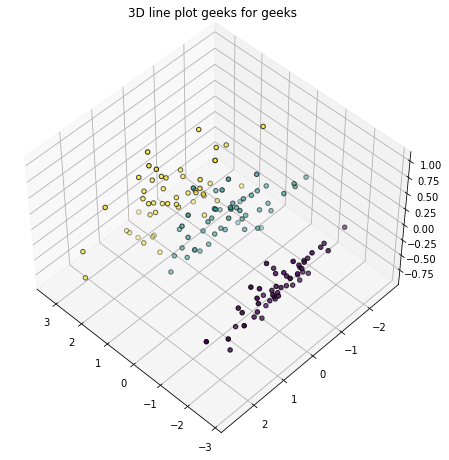

In [35]:
fig = plt.figure(1, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_title('3D line plot geeks for geeks')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor='k')
plt.show()